In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Input

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Input(shape=(28,28,)),
    Flatten(),
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(10, activation="softmax"),
])

In [4]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Input((28,28,1)),
    Conv2D(16, (3,3), activation="relu"),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation="softmax")
])

In [7]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [9]:
# Print the resulting model attributes

print(model.optimizer)
print(model.loss)
print(model.metrics)

sparse_categorical_crossentropy
[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [25]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [27]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.0
test_images = test_images / 255.0

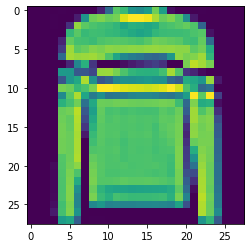

Label: Pullover


In [30]:
# Display one of the images
idx = 5
image = train_images[idx, :, :]
plt.imshow(image)
plt.show()
print(f"Label: {labels[train_labels[idx]]}")

#### Fit the model

In [33]:
# Fit the model

history = model.fit(train_images[..., np.newaxis], train_labels, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2862 - accuracy: 0.8971

#### Plot training history

In [34]:
# Load the history into a pandas Dataframe

history.history

{'loss': [0.2861956059932709,
  0.28328678011894226,
  0.28050515055656433,
  0.28055539727211,
  0.2775411605834961,
  0.27580320835113525,
  0.27399781346321106,
  0.27352845668792725,
  0.2718674838542938,
  0.2703845500946045,
  0.26910653710365295,
  0.2673580050468445,
  0.26592060923576355,
  0.26490357518196106,
  0.2634284496307373,
  0.2624511420726776,
  0.26221320033073425,
  0.26074686646461487,
  0.2596157193183899,
  0.25824564695358276],
 'accuracy': [0.8971499800682068,
  0.8987500071525574,
  0.8996833562850952,
  0.8990333080291748,
  0.9005500078201294,
  0.9009166955947876,
  0.9017666578292847,
  0.9018999934196472,
  0.9015666842460632,
  0.902816653251648,
  0.9031333327293396,
  0.9042666554450989,
  0.9048500061035156,
  0.9046499729156494,
  0.9054999947547913,
  0.9056833386421204,
  0.9057833552360535,
  0.9060666561126709,
  0.9060999751091003,
  0.9062166810035706]}

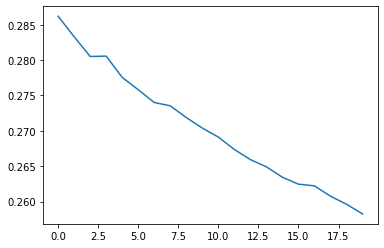

In [35]:
# Make a plot for the loss

plt.plot(history.history["loss"])
plt.show()

In [19]:
# Make a plot for the accuracy



In [20]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [37]:
# Evaluate the model

loss, accuracy = model.evaluate(test_images[..., np.newaxis], test_labels)
loss, accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.3074 - accuracy: 0.8889


(0.30743208527565, 0.8888999819755554)

#### Make predictions from the model

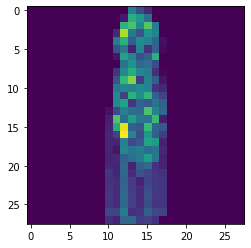

Label: Dress


In [46]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [47]:
# Get the model predictions

# test_image.reshape(1, 28, 28, 1) or test_image[np.newaxis, ..., np.newaxis]
pred = model.predict(test_image.reshape(1, 28, 28, 1))
labels[np.argmax(pred)]

'Dress'